Document link: http://tiny.cc/LogReg



The problem that we are going to solve here is that given a set of features that describe a claimant who is going to claim for the insurance amount, our machine learning model must predict whether the claimant will hire an attorney or not to run the case. To train our machine learning model with insurance data, we will be using [ClaimantsData](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
data.shape

(1340, 7)

In [4]:
# dropping the CASENUM column
data.drop(['CASENUM'],axis=1,inplace=True)
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [5]:
data.shape

(1340, 6)

In [6]:
#checking the description
data.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [7]:
#checking for missing values
data.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [8]:
#data['CLMSEX']=data['CLMSEX'].fillna()
#data['CLMINSUR']=data['CLMINSUR'].fillna()


In [9]:
#to check the frquency how many times one value is repeated in CLMSEX column
data.CLMSEX.value_counts().index[0]

1.0

In [10]:
#creating user-defined function for imputing the missing values
#with mode(numerical and categorical data)
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
data.apply(lambda col:fill_na(col))
data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

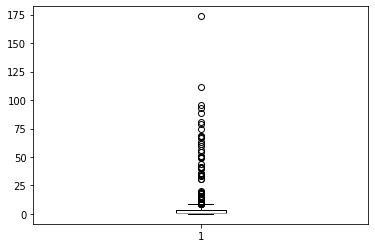

In [11]:
## loss column
plt.boxplot(data.LOSS)
plt.show()

In [12]:
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [13]:
#iloc-row indices,column indices
data.iloc[:,1:]
#indices of the columns which we need to access

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,10.0,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [14]:
#split the data into Input and Output
x=data.iloc[:,1:]
y=data.ATTORNEY

In [35]:
##split the data into training and testing
#build the model on training and check the model performance on test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [16]:
# build the classifier on training data
#sklearn library:import,instantiate,fit
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)#inside fit input and output will be passed

C:\Users\SATYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
#predicting on train data
#syntax:objectname.predict(input)
y_train_pred=reg.predict(x_train)
y_train_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [18]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_train,y_train_pred)
conf

array([[315, 170],
       [107, 346]], dtype=int64)

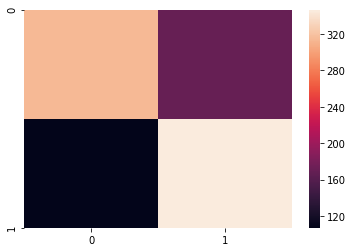

In [19]:
sns.heatmap(conf)

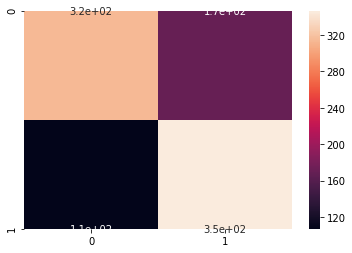

In [20]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True)

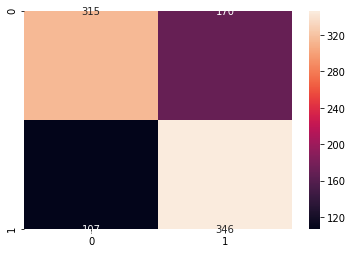

In [21]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f')

In [22]:
conf

array([[315, 170],
       [107, 346]], dtype=int64)

In [23]:
print(conf[0][0])
print(conf[0][1])
print(conf[1][0])
print(conf[1][1])


315
170
107
346


In [24]:
print('true_positive=',conf[0][0])
print('false_positive=',conf[0][1])
print('false_negative=',conf[1][0])
print('true_negative=',conf[1][1])


true_positive= 315
false_positive= 170
false_negative= 107
true_negative= 346


In [25]:
## Accuracy--> TP+TN/TP+FP+TN+FN
## correct predictions/total no of predictions
(315+346)/(315+170+107+346)

0.7046908315565032

In [26]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7046908315565032

In [27]:
true_negative=conf[0][0]
false_positive=conf[0][1]
false_negative=conf[1][0]
true_positive=conf[1][1]

In [28]:
## prediction rate
precision=true_positive/(true_positive+false_positive)
precision

0.6705426356589147

In [29]:
#precision
#syntaax:precision_score(actualvalues,predicted values)
from sklearn.metrics import precision_score,recall_score
precision_score(y_train,y_train_pred)

0.6705426356589147

In [30]:
#out of all the actual values how many are correctly classified
Recall=true_positive/(true_positive+false_negative)
print(Recall)
#recall calculated by using a function
recall_score(y_train,y_train_pred)

0.7637969094922737


0.7637969094922737

In [31]:
# Calculation f1-score for the model
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred) #f1_score(Actual Values,Predicted Values)


0.7141382868937047

In [32]:

# Prediction on Test Data
# Calculate the metrics for test data--> confusion matrix
# Precision,Recall,F1-Score
# Compare the score with training data

In [36]:
# Make predictions on test data and calculate the precision, recall and f1-score.
from  sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_test,y_test)


C:\Users\SATYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_test_pred = reg.predict(xfrom sklearn.metrics import confusion_matrix,accuracy_score
conf = confusion_matrix(y_test,y_test_pred)
conf
_test)
y_test_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf = confusion_matrix(y_test,y_test_pred)
conf


array([[119,  81],
       [ 39, 163]], dtype=int64)

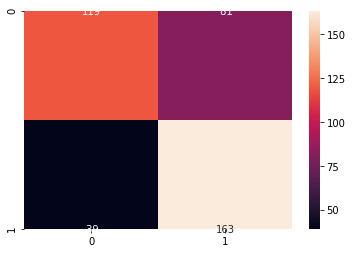

In [40]:
sns.heatmap(conf,annot=True,fmt='3.0f')

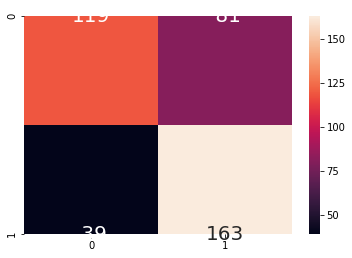

In [41]:

sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [42]:

print('true_positive =',conf[0][0])
print('false_positive =',conf[0][1])
print('true_negative =',conf[1][0])
print('false_negative =',conf[1][1])

true_positive = 119
false_positive = 81
true_negative = 39
false_negative = 163


In [43]:
true_positive =conf[0][0]
false_positive =conf[0][1]
false_negative =conf[1][0]
true_negative =conf[1][1]

In [44]:
accuracy_score(y_test,y_test_pred)

0.7014925373134329

In [45]:

from sklearn.metrics import precision_score
precision_score(y_test,y_test_pred)

0.6680327868852459

In [46]:

Recall = true_positive/(true_positive+false_negative)
Recall

0.7531645569620253

In [47]:
from sklearn.metrics import f1_score
f1_score(y_test,y_test_pred)

0.7309417040358746

In [48]:
# Find the frequency of categories in the CLMSEX column and plot a graph. Write the observations which category people are more.
data.CLMSEX.value_counts()

1.0    754
0.0    586
Name: CLMSEX, dtype: int64

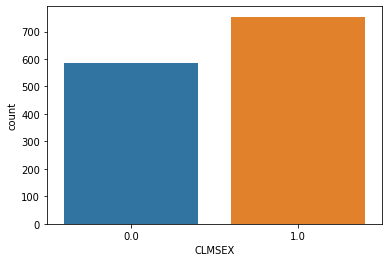

In [49]:
sns.countplot(data.CLMSEX)

### As observed in the above graph ,we can conclude that female are more as claimants.

In [50]:
#Plot the visualizations of the column CLMAGE and find the pattern in the data like which age group people
#were more as claimants 
data.CLMAGE.describe()

count    1340.000000
mean       25.817164
std        19.879401
min         0.000000
25%        10.000000
50%        17.000000
75%        40.000000
max        95.000000
Name: CLMAGE, dtype: float64

In [51]:
data['CLMRANGE']=pd.cut(data.CLMAGE,bins=[0,10,17,40,95])

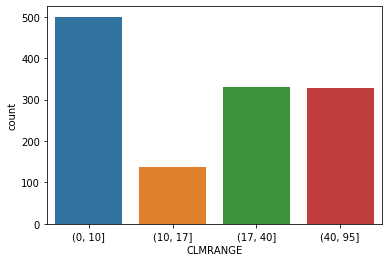

In [52]:
sns.countplot(data.CLMRANGE)

### 0-10 Age group are more as claimants.

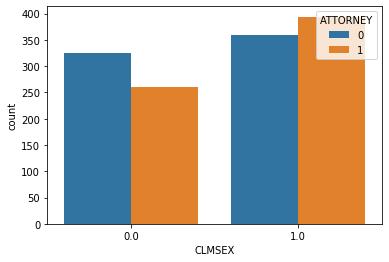

In [53]:
# Visualize how many claimants are going to hire an attorney with respect to CLMSEX i.e., 
#out of male claimants how many will hire an attorney; out of female how many will hire an attorney
sns.countplot(data.CLMSEX,hue=data.ATTORNEY)

### Female claimants hire the Attorney mostly and Male claimant hire the Attorney lesser times than Female

In [54]:
# Check the correlation of the dataset and visualize it through heatmap
data.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.076564,0.076631,-0.055848,-0.016396,-0.219715
CLMSEX,0.076564,1.000000,0.065976,-0.016327,-0.013789,-0.028412
CLMINSUR,0.076631,0.065976,1.000000,0.019953,0.030389,0.004641
SEATBELT,-0.055848,-0.016327,0.019953,1.000000,-0.018020,0.111879
CLMAGE,-0.016396,-0.013789,0.030389,-0.018020,1.000000,0.051575
LOSS,-0.219715,-0.028412,0.004641,0.111879,0.051575,1.000000


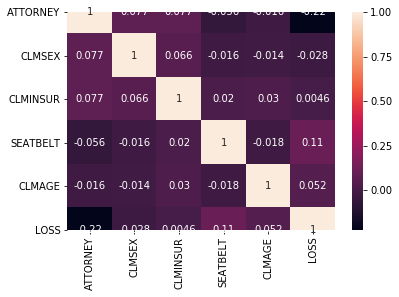

In [55]:
sns.heatmap(data.corr(),annot=True)

In [56]:
# Calculate the number people who did not wear SEATBELT, what is their percentage of hiring attorney 
se=data[data.SEATBELT==0]
se.shape[0]


1318

In [57]:
seat=se[se.ATTORNEY==1]
seat.shape[0]

649

In [58]:
# Percentage of hiring attorney who did not wear SEATBELT
(seat.shape[0]/se.shape[0])*100

49.241274658573595